In [1]:
from classification.classifier import SWAPclassifier

Text(0.5, 1.0, 'XOR data')

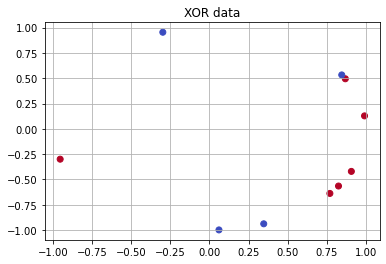

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# XOR data
num_data = 10
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_X = np.array([x/np.linalg.norm(x) for x in XOR_X])
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

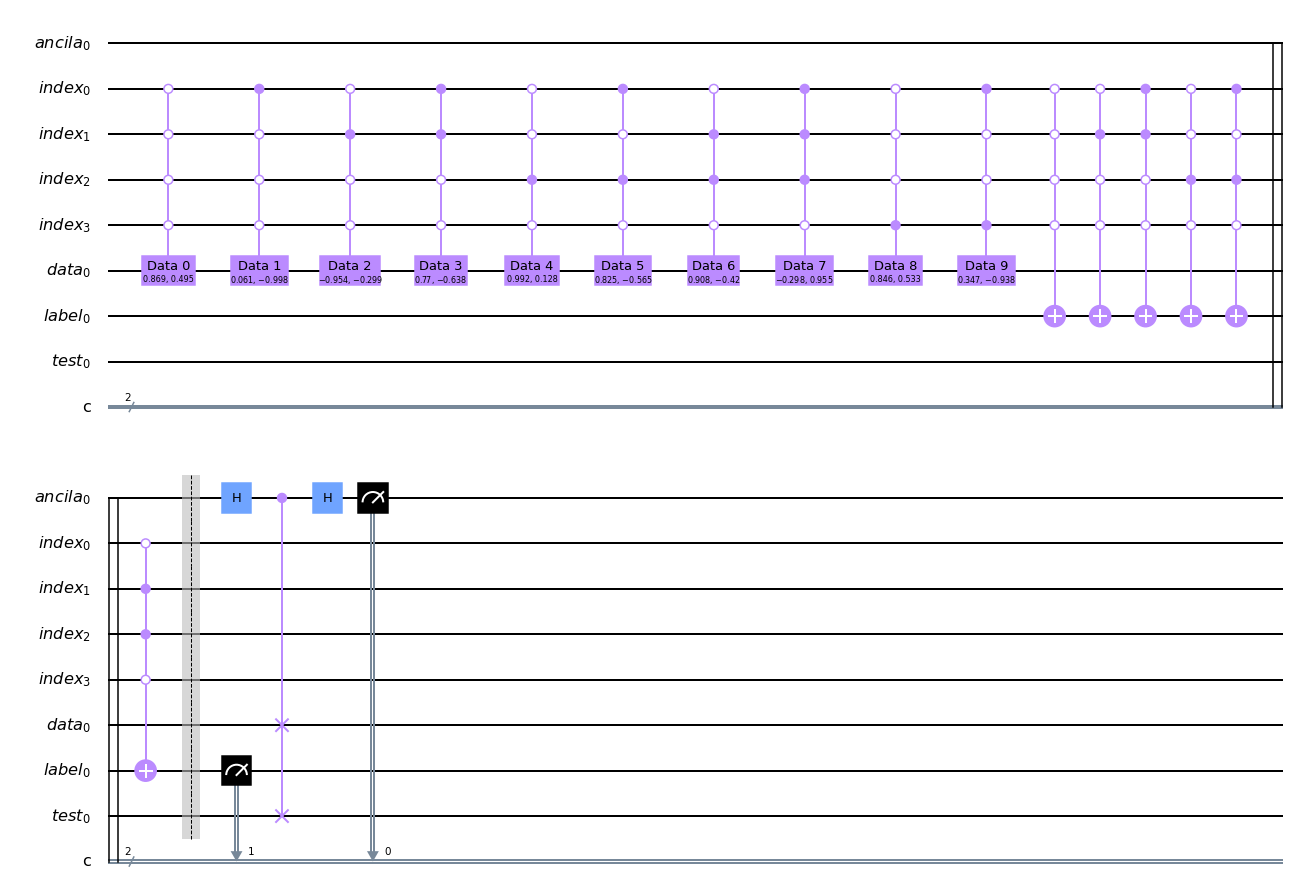

In [3]:
cls = SWAPclassifier(XOR_X, XOR_rot_y)
cls.training_circ.draw('mpl')

In [11]:
cls.qreg

[QuantumRegister(1, 'ancila'),
 QuantumRegister(4, 'index'),
 QuantumRegister(1, 'data'),
 QuantumRegister(1, 'label'),
 QuantumRegister(1, 'test')]

In [5]:
import random
random.randint()

TypeError: randint() missing 2 required positional arguments: 'a' and 'b'

In [22]:
from qiskit import BasicAer, IBMQ
provider = IBMQ.load_account()
backends = provider.backends(simulator=False, operational=True)
type(backends[0])

ibmqfactory.load_account:WARNING:2020-09-24 01:42:26,204: Credentials are already in use. The existing account in the session will be replaced.


qiskit.providers.ibmq.ibmqbackend.IBMQBackend